In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
import warnings
warnings.filterwarnings("ignore")
import math
import seaborn as sns

Loading the dataset

In [5]:
DataFrame = pd.read_csv("/content/pulsar_data_train.csv")

Investigating the Dataset

In [6]:
DataFrame.head(5)    # first 5 rows of whole columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


Looking to Dtypes and amounts of values

In [152]:
DataFrame.info()     # information about data types and amount of non-null rows of our Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


Statistical Investigation

In [8]:
DataFrame.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [9]:
DataFrame.corr()    # correlation between fields

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.551105,-0.872595,-0.737598,-0.298123,-0.313845,0.235781,0.146782,-0.676129
Standard deviation of the integrated profile,0.551105,1.000000,-0.527779,-0.539896,-0.001656,-0.058241,0.031671,0.028757,-0.365757
Excess kurtosis of the integrated profile,-0.872595,-0.527779,1.000000,0.944648,0.414739,0.439037,-0.341394,-0.214991,0.791661
Skewness of the integrated profile,-0.737598,-0.539896,0.944648,1.000000,0.412659,0.420058,-0.328675,-0.204148,0.707086
Mean of the DM-SNR curve,-0.298123,-0.001656,0.414739,0.412659,1.000000,0.797974,-0.616385,-0.353898,0.400375
Standard deviation of the DM-SNR curve,-0.313845,-0.058241,0.439037,0.420058,0.797974,1.000000,-0.808061,-0.574594,0.497210
Excess kurtosis of the DM-SNR curve,0.235781,0.031671,-0.341394,-0.328675,-0.616385,-0.808061,1.000000,0.924264,-0.389788
Skewness of the DM-SNR curve,0.146782,0.028757,-0.214991,-0.204148,-0.353898,-0.574594,0.924264,1.000000,-0.259065
target_class,-0.676129,-0.365757,0.791661,0.707086,0.400375,0.497210,-0.389788,-0.259065,1.000000


In [144]:
DataFrame.columns.tolist()

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

In [145]:
DataFrame.shape

(12528, 9)

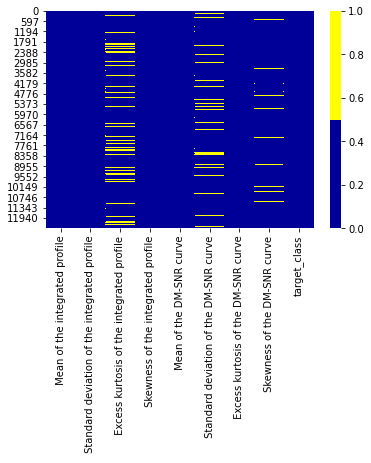

In [177]:
cols = DataFrame.columns[:9] # первые 9 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(DataFrame[cols].isnull(), cmap=sns.color_palette(colours))

#Data Cleaning
#### Delete NAN rows

In [147]:
df= DataFrame.dropna()

In [148]:
df.shape  #it was deleted about 3000 rows

(9273, 9)

In [149]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000
mean,111.133750,46.514053,0.479546,1.790673,12.735359,26.327860,8.327933,105.783345,0.091664
std,25.686405,6.781320,1.071155,6.286567,29.766782,19.542634,4.549914,108.166669,0.288567
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,100.984375,42.398382,0.024497,-0.188021,1.910535,14.376641,5.788817,34.917943,0.000000
50%,115.234375,46.895026,0.223858,0.202884,2.797659,18.435186,8.427475,83.151969,0.000000
75%,127.328125,51.001785,0.472066,0.930710,5.459866,28.387019,10.721934,139.770330,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


# Определяю выбросы
### Для определения выбросов использую поиск min-max значений для атрибутов, где mean отличается от min/max в 10 и более раз
у нас 5 таких атрибутов:
- Mean of the integrated profile	
- Excess kurtosis of the integrated profile (mean = 0.48, max = 8.1) дельта х20
- Skewness of the integrated profile        (mean = 1.79, max = 68.1) дельта х30
- Mean of the DM-SNR curve                  (mean ~ 12, max ~ 212)    дельта х20
- Skewness of the DM-SNR curve	            (mean ~ 106, max ~ 1191)  дельта х10


In [99]:
df_new = df[np.abs(df - df.mean()) <= (3 * df.std())] ### исключаем значения за пределами 3-х сигма

In [100]:
df_new.describe()   ### смотрим на результат

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,9043.000000,9221.000000,8946.000000,9003.000000,8935.000000,9061.000000,9186.000000,9094.000000,8423.0
mean,113.408396,46.389677,0.308022,0.833863,7.963874,24.783754,8.170428,96.366298,0.0
std,21.522103,6.493593,0.563386,2.483756,16.290861,16.905366,4.261403,82.687444,0.0
min,34.085938,26.179797,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.0
25%,102.246094,42.385139,0.018456,-0.197625,1.884615,14.292575,5.734986,33.547672,0.0
50%,115.882812,46.868421,0.207805,0.177978,2.726589,18.201225,8.394860,81.410005,0.0
75%,127.687500,50.917144,0.437497,0.817898,4.823997,27.175028,10.643778,134.992473,0.0
max,185.257812,66.727049,3.691603,20.629865,101.869565,84.877412,21.893055,429.015329,0.0


In [156]:
df_dropna=df_new.dropna()

In [157]:
df_dropna.describe()  ### ушла еще 1000 строк

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,114.150336,46.737083,0.301680,0.698489,5.717473,22.705841,8.696282,104.423879
std,19.331641,5.935636,0.515895,1.961910,10.685631,13.907025,3.572972,80.954428
min,35.640625,29.168706,-1.496372,-1.207550,0.559365,9.643702,-0.731596,-1.936212
25%,102.867188,42.835993,0.023538,-0.189479,1.898829,14.301180,6.542161,46.407355
50%,115.945312,46.990685,0.211630,0.180465,2.681438,17.860714,8.654156,88.370580
75%,127.460938,50.965212,0.435126,0.796066,4.299331,25.024600,10.757831,140.894151
max,178.859375,65.801858,3.683243,20.283089,101.697324,84.871045,20.295627,429.015329


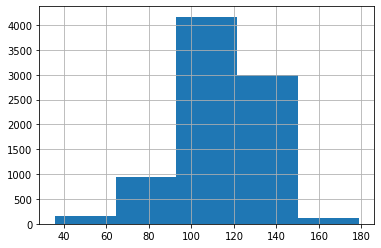

In [123]:
df_dropna[" Mean of the integrated profile"].hist(bins=5)  

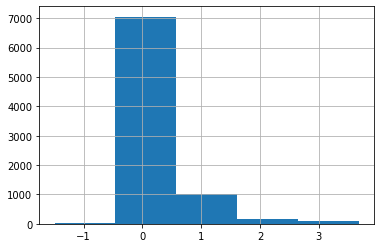

In [124]:
df_dropna[" Excess kurtosis of the integrated profile"].hist(bins=5) ## видим, что ~95% значений расположены в диапазоне от -2 до 2. 
##В принципе, все значения >2 можно смело удалить для очистки от выбросов

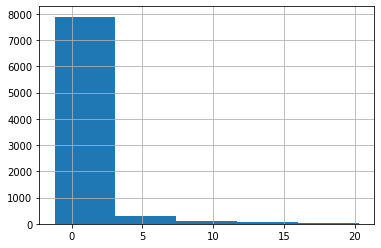

In [125]:
df_dropna[" Skewness of the integrated profile"].hist(bins=5)  ### здесь все что > 20 будет только мешать расчетам

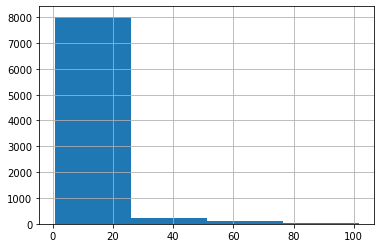

In [126]:
df_dropna[" Mean of the DM-SNR curve"].hist(bins=4)   ### отсечь все что больше 50

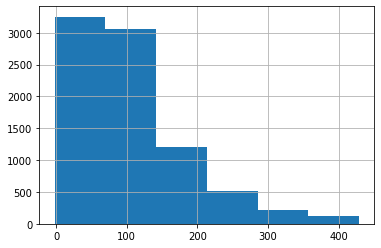

In [127]:
df_dropna[" Skewness of the DM-SNR curve"].hist(bins=6)  ### лучше отсечь все что болеее 400

In [78]:
df.nlargest(400," Excess kurtosis of the integrated profile") ### удалив ~ 4% от выборки, в 2,5 раза сократим максимальное значение

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3289,11.140625,25.695250,8.069522,68.101622,75.832776,70.894821,0.781356,-0.152781,1.0
12173,8.250000,26.943517,7.879628,63.466388,48.654682,58.294349,1.514147,1.877476,1.0
12363,10.320312,26.871201,7.875742,63.149537,38.887960,58.923800,1.635320,2.225703,1.0
9065,8.156250,27.129446,7.856370,62.868531,128.375418,67.902648,-0.177335,-0.673351,1.0
6483,8.226562,30.904898,7.627580,57.070493,149.777592,65.436167,-0.331612,-0.497152,1.0
...,...,...,...,...,...,...,...,...,...
1698,66.523438,34.490253,3.194012,13.844650,14.184783,46.450212,3.625586,12.568444,1.0
4054,26.257812,49.601734,3.175991,8.806833,181.746656,60.776100,-0.379428,-1.119172,1.0
7898,56.617188,36.825628,3.170534,13.042896,116.165552,91.662247,-0.128000,-1.587711,1.0
8167,50.828125,31.805097,3.160720,15.945822,14.989967,49.597122,3.495529,11.301743,1.0


In [81]:
df.nlargest(300," Skewness of the integrated profile")  ## если удалить эти 300 строк (~ 3% выборки), то максимальное значение для выбранного атрибута сократится в 3(!) раза 

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3289,11.140625,25.695250,8.069522,68.101622,75.832776,70.894821,0.781356,-0.152781,1.0
12173,8.250000,26.943517,7.879628,63.466388,48.654682,58.294349,1.514147,1.877476,1.0
12363,10.320312,26.871201,7.875742,63.149537,38.887960,58.923800,1.635320,2.225703,1.0
9065,8.156250,27.129446,7.856370,62.868531,128.375418,67.902648,-0.177335,-0.673351,1.0
2837,12.507812,27.597553,7.572577,58.294501,42.612876,59.377834,1.565603,1.907165,1.0
...,...,...,...,...,...,...,...,...,...
11867,42.578125,35.295540,4.004085,19.064779,19.426421,50.234055,2.932874,8.147741,1.0
6144,45.179688,33.574179,3.860706,19.016795,51.359532,74.698689,1.371305,0.587868,1.0
1673,49.000000,31.462776,3.500561,18.936911,7.443980,30.929487,4.988605,26.945094,1.0
7062,43.304688,33.896340,3.878155,18.820476,39.479933,62.312465,1.826541,2.669156,1.0


In [86]:
df.nlargest(600, ' Mean of the DM-SNR curve')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
7613,107.539062,86.951396,-0.008928,-1.676724,211.948997,54.010310,-2.556795,5.768458,0.0
10447,168.703125,49.806243,-0.738803,0.510047,209.300167,61.946757,-2.157756,3.997383,0.0
1145,118.500000,50.953103,0.550068,-0.198991,208.629599,45.183858,-2.526430,6.203674,0.0
845,97.742188,59.564073,0.693108,-0.614142,206.529264,38.768695,-2.636857,8.080101,0.0
9213,177.742188,51.810238,-1.310080,1.410907,203.817726,60.178957,-2.007732,3.608160,0.0
...,...,...,...,...,...,...,...,...,...
6708,37.117188,30.671297,4.628308,28.675640,66.000000,86.284549,0.953254,-0.641794,1.0
7227,112.531250,44.139505,0.417418,0.172599,65.734114,86.605405,0.710985,-1.263896,0.0
2624,38.718750,28.335032,4.756850,31.211345,65.596990,79.190109,1.062863,-0.137075,1.0
5288,130.226562,52.541831,0.124992,-0.095052,65.566054,84.174765,0.523964,-1.681597,0.0


In [29]:
df.nlargest(100, " Skewness of the DM-SNR curve") ## сокращаем максимальное значение параметра в 2 раза

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
1269,131.648438,50.254911,0.009662,0.085277,0.213211,7.370432,34.539844,1191.000837,0.0
5263,97.671875,47.232654,0.244584,0.147137,0.213211,7.370432,34.539844,1191.000837,0.0
11660,138.710938,44.727151,-0.167656,0.351446,0.213211,7.370432,34.539844,1191.000837,0.0
5821,82.054688,59.298149,1.202599,0.727364,0.289298,7.448817,33.489755,1140.353233,0.0
797,117.828125,56.334535,0.193014,-0.375586,0.249164,7.473462,33.273411,1126.765431,0.0
...,...,...,...,...,...,...,...,...,...
3473,163.640625,50.005271,-0.441821,-0.224092,0.459030,9.548722,22.329005,525.725453,0.0
2417,87.898438,44.789410,0.712987,1.151077,0.642140,9.127801,20.822576,523.851700,0.0
7511,110.656250,42.948995,0.151070,0.695922,0.596154,10.768076,22.341990,519.463141,0.0
4731,121.390625,49.963774,0.131397,-0.218170,0.612040,9.285241,21.198564,518.146971,0.0


# **Visual EDA**

In [129]:
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns              # more advanced visual plotting library

PairPlot (each column is compared the others and itself)

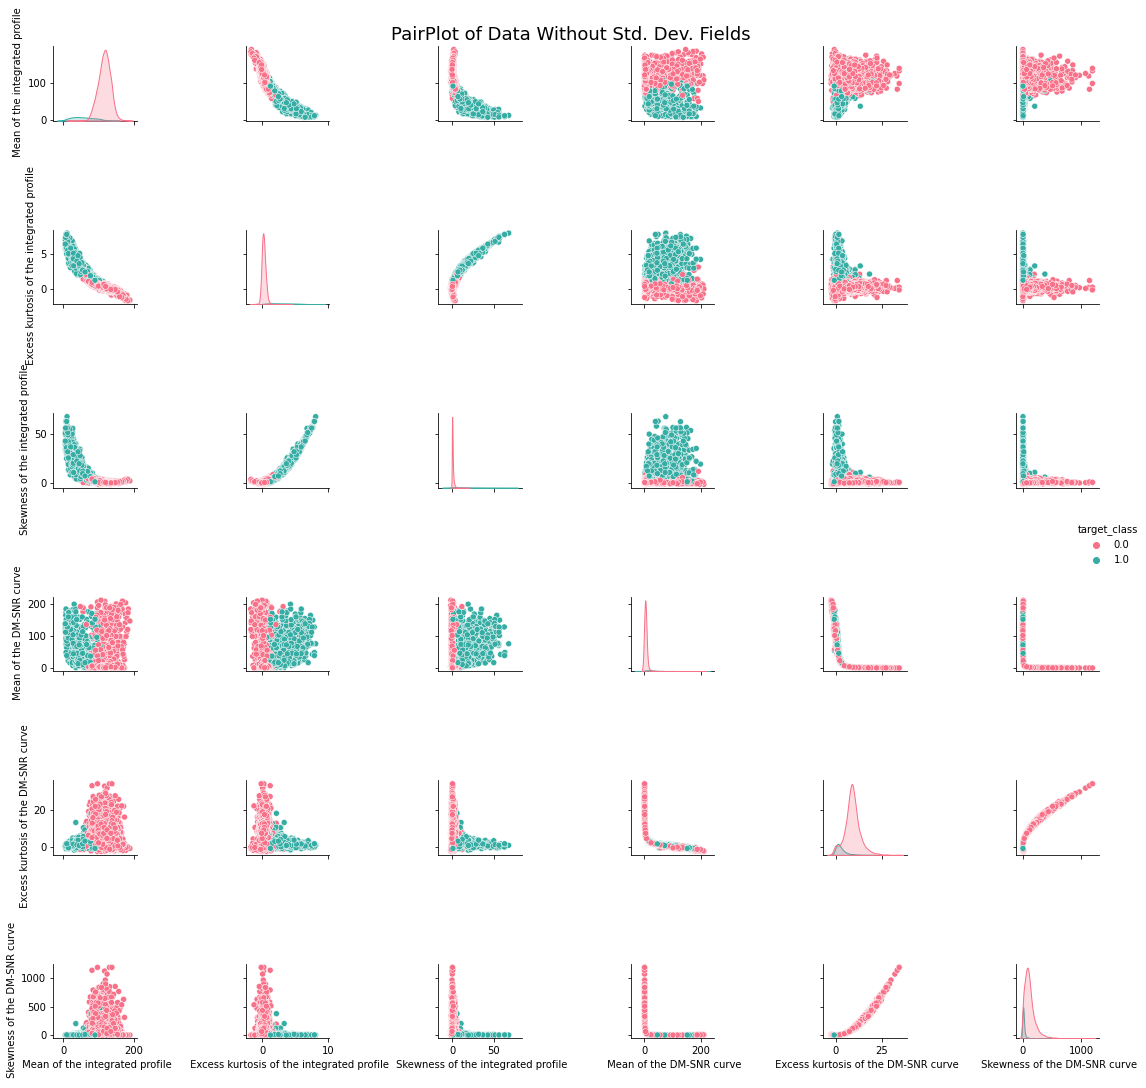

In [169]:
sns.pairplot(data=df,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()   # pairplot without standard deviaton fields of data

we can see that our data is quite separable on most of the columns

## Correlation HeatMap 

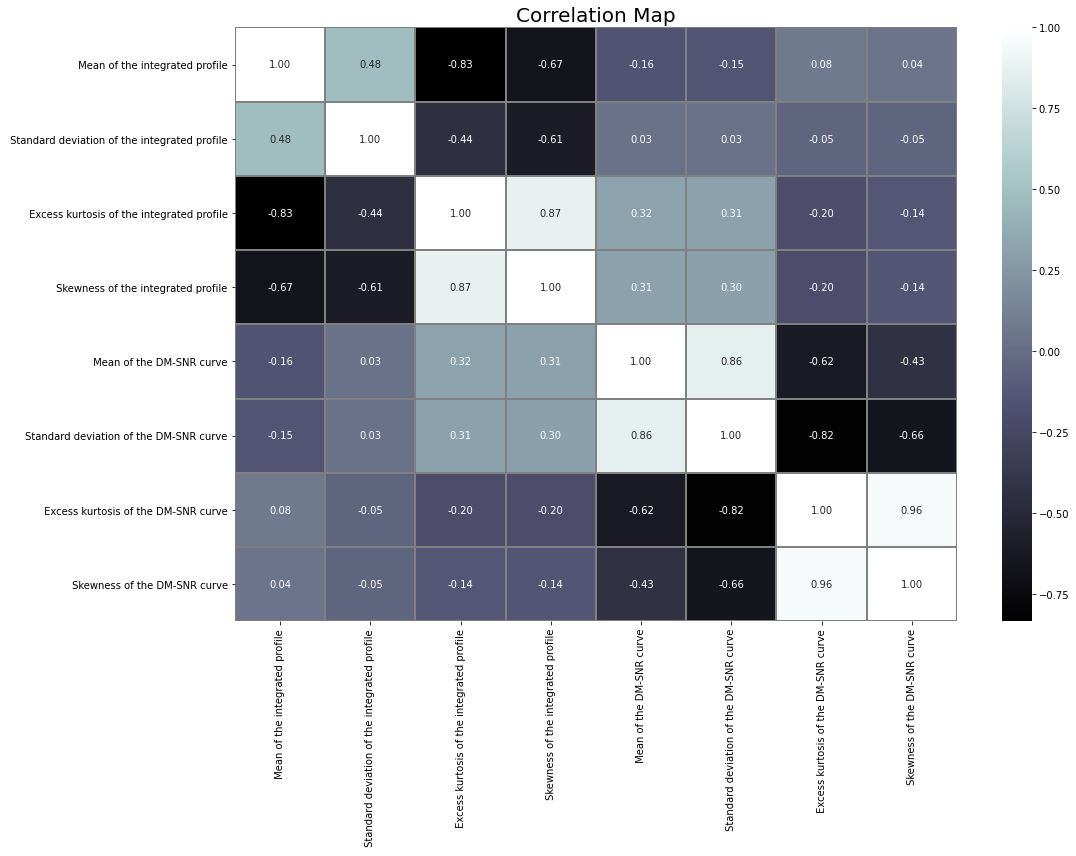

In [134]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_dropna.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()      # lightest and darkest cells are most correlated ones

Most of our Columns are already related or derived from one or another. And we can see it clearly on some Cells above

##ViolinPlot (act as a boxplot but we can see amounts too)


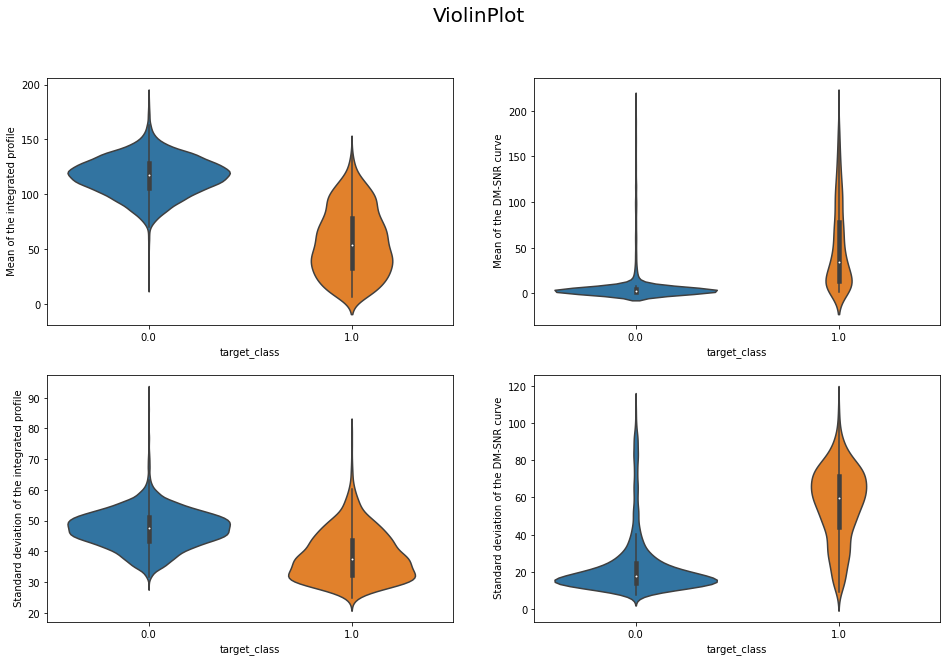

In [137]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.violinplot(data=df,y=" Mean of the integrated profile",x="target_class")

plt.subplot(2,2,2)
sns.violinplot(data=df,y=" Mean of the DM-SNR curve",x="target_class")

plt.subplot(2,2,3)
sns.violinplot(data=df,y=" Standard deviation of the integrated profile",x="target_class")

plt.subplot(2,2,4)
sns.violinplot(data=df,y=" Standard deviation of the DM-SNR curve",x="target_class")

plt.suptitle("ViolinPlot",fontsize=20)
plt.show()

it shows us that our data has different kind of distributions which is helpful for training our models.

#**Data PreProcessing**
###Splitting the Feature and Label fields

> 



In [ ]:
labels = df_dropna.target_class.values

df_dropna.drop(['target_class'],axis=1,inplace=True)

features = df_dropna.values

###Scalling the features

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

features_scaled = scaler.fit_transform(features)

###Splitting the Train and the Test rows

In [166]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_scaled,labels,test_size=0.2)

#**Machine Learning Models**


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42,solver="liblinear",C=1.6,penalty="l1")
lr_model.fit(x_train,y_train)
y_head_lr = lr_model.predict(x_test)
lr_score = lr_model.score(x_test,y_test)

##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=42)

dc_model.fit(x_train,y_train)

y_head_dc = dc_model.predict(x_test)

dc_score = dc_model.score(x_test,y_test)

##Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=37,random_state=42,max_leaf_nodes=200,criterion="entropy")

rfc_model.fit(x_train,y_train)

y_head_rfc = rfc_model.predict(x_test)

rfc_score = rfc_model.score(x_test,y_test)

##Naive Bayes Classifier 

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(x_train,y_train)

y_head_nb = nb_model.predict(x_test)

nb_score = nb_model.score(x_test,y_test)

##K Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7,weights="distance")

knn_model.fit(x_train,y_train)

y_head_knn = knn_model.predict(x_test)

knn_score = knn_model.score(x_test,y_test)

##Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42,C=250,gamma=1.6,kernel="poly",probability=True)

svm_model.fit(x_train,y_train)

y_head_svm = svm_model.predict(x_test)

svm_score = svm_model.score(x_test,y_test)



#**Model Evaluating**
##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dc = confusion_matrix(y_test,y_head_dc)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rfc = confusion_matrix(y_test,y_head_rfc)
cm_svm = confusion_matrix(y_test,y_head_svm)

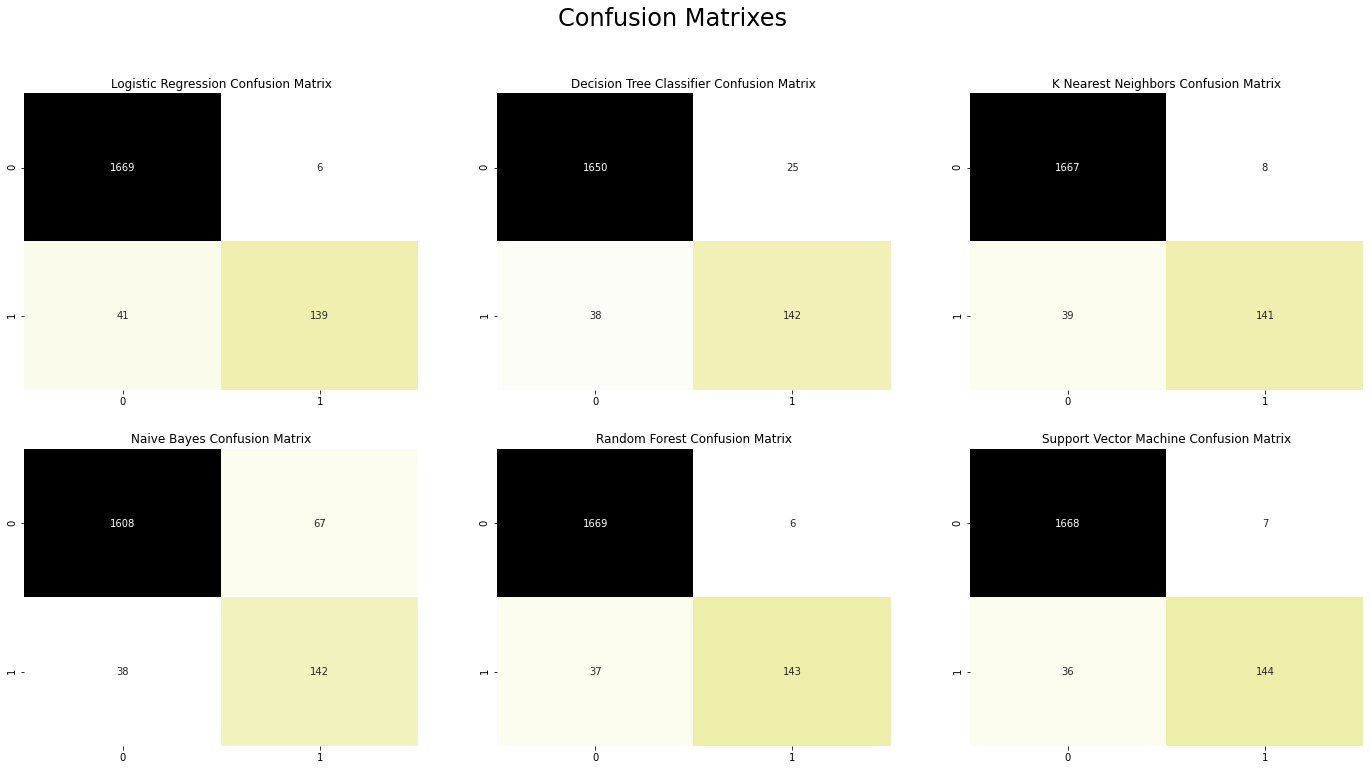

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dc,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rfc,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,6)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.show()


if we compare total mistakes: RandomForest, SVM, KNN seem to be best for this dataset



##Bar Chart Comparison

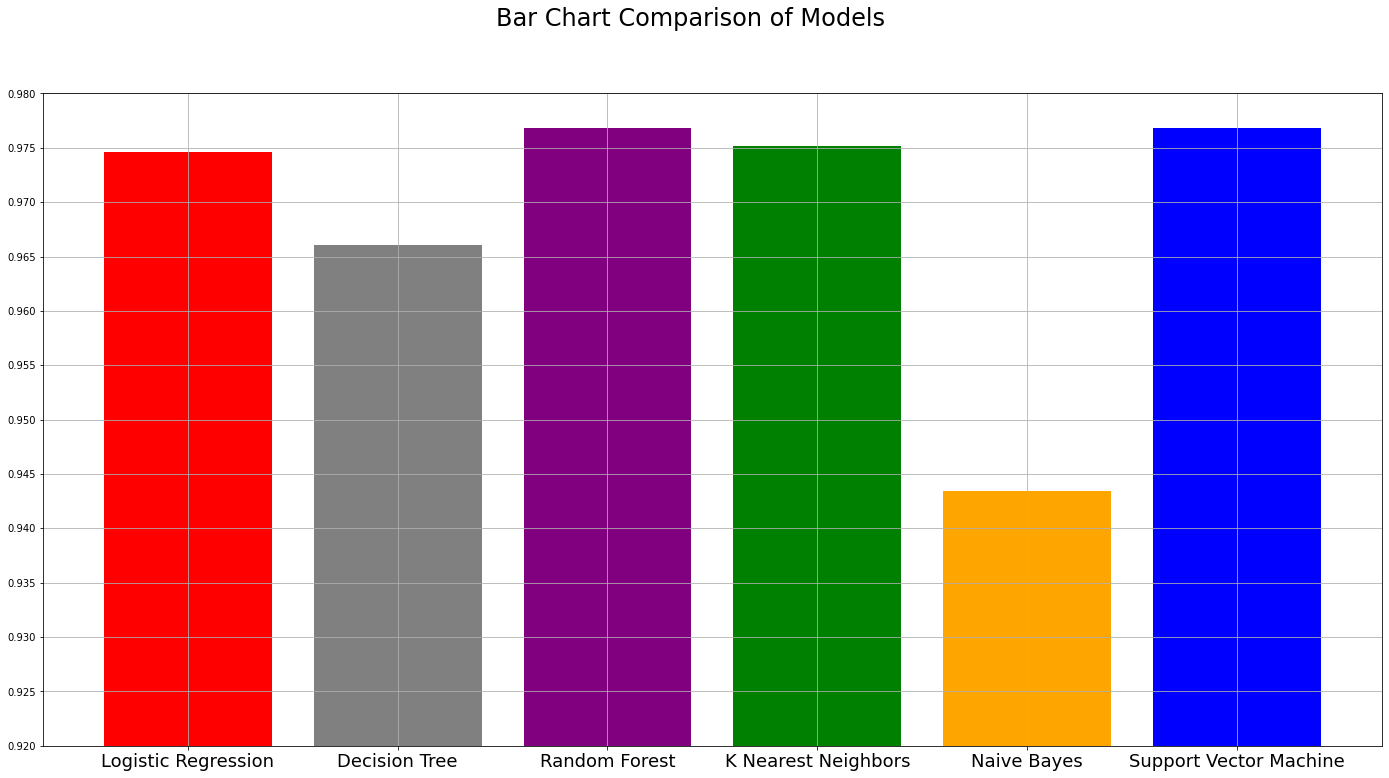

In [ ]:
algorithms = ("Logistic Regression","Decision Tree","Random Forest","K Nearest Neighbors","Naive Bayes","Support Vector Machine")
scores = (lr_score,dc_score,rfc_score,knn_score,nb_score,svm_score)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")

plt.figure(figsize=(24,12))
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.005))
plt.ylim(0.92,0.98)
plt.bar(y_pos,scores,color=colors)
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=24)
plt.show()

if we look at the graph and check the scores, LogisticRegression, RandomForest and SVM are better than the others.

#**Conclusion**

After my tests I see that:
RandomForest and SVM are Overall winnners in my case above.